In [3]:
import pandas as pd
import numpy as np
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [11]:
df = pd.read_csv("C:/Users/Ankan SInha/Desktop/data_final_123.csv")

In [12]:
df

,User,Homonym/tweet for Ironic user,Homonym/tweet forNon-Ironic user,Homonyms/Ironic user,Homonym/Non-Ironic User,real
0,1,87.93,47.97,14.371905,12.035119,1
1,2,60.65,56.78,23.143519,14.033113,0
2,3,85.43,56.30,23.237668,21.097353,1
3,4,78.63,49.68,20.251030,15.721862,0
4,5,89.20,57.94,21.097353,11.090000,1
5,6,66.40,41.32,15.721862,14.230000,1
6,7,83.86,53.23,22.860000,10.860000,1
7,8,62.12,48.89,14.320000,9.870000,1
8,9,87.74,49.22,16.890000,14.670000,1
9,10,71.48,55.68,20.230000,17.230000,1


In [13]:
df.describe()

,User,Homonym/tweet for Ironic user,Homonym/tweet forNon-Ironic user,Homonyms/Ironic user,Homonym/Non-Ironic User,real
count,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,5.50000,77.344000,51.70100,19.212334,14.083745,0.800000
std,3.02765,11.229019,5.20544,3.583483,3.390317,0.421637
min,1.00000,60.650000,41.32000,14.320000,9.870000,0.000000
25%,3.25000,67.670000,48.97250,16.013896,11.326280,1.000000
50%,5.50000,81.245000,51.45500,20.240515,14.131556,1.000000
75%,7.75000,87.162500,56.14500,22.419338,15.458896,1.000000
max,10.00000,89.200000,57.94000,23.237668,21.097353,1.000000


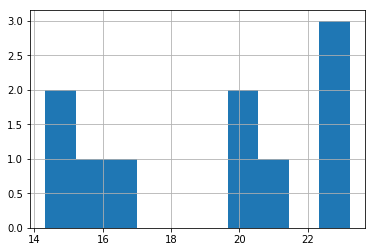

In [18]:
df['Homonyms/Ironic user'].hist()

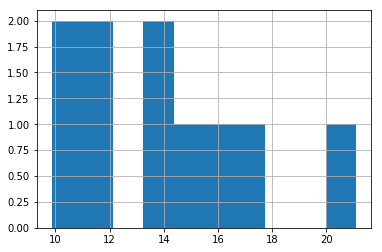

In [20]:
df['Homonym/Non-Ironic User'].hist()

In [26]:
M = np.concatenate(["Irony/tweet", "Non-Irony/tweet", "Irony/user", "Non-Irony/User"],axis=1)

ValueError: zero-dimensional arrays cannot be concatenated

In [27]:
pos_vectorizer = TfidfVectorizer(
    tokenizer=None,
    lowercase=False,
    preprocessor=None,
    ngram_range=(1, 3),
    stop_words=None,
    use_idf=False,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=2,
    min_df=5,
    max_df=0.75,
    )

In [28]:
y = df['Irony/tweet'].astype(int)

In [29]:
x = df['Non-Irony/tweet'].astype(int)

In [35]:
import numpy as np

currentDataClass = [87.93
60.65
85.43
78.63
89.2
66.4
83.86
62.12
87.74
71.48
]
predictedClass = [1
0
1
0
1
1
1
1
1
1
]

def comp_confmat(actual, predicted):

    classes = np.unique(actual) # extract the different classes
    matrix = np.zeros((len(classes), len(classes))) # initialize the confusion matrix with zeros

    for i in range(len(classes)):
        for j in range(len(classes)):

            matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return matrix

comp_confmat(currentDataClass, predictedClass)

SyntaxError: invalid syntax (<ipython-input-35-cb44b764dfc8>, line 4)